In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install pystan
!pip install fbprophet

In [3]:
data = pd.read_csv('/content/training data.xls',parse_dates = ['Week Start Date'])
                                      
data.head(5)

,Product Name,Week Start Date,Weekly Demand Quantity
0,Chocolate,2018-07-07,3198
1,Chocolate,2018-07-14,12181
2,Chocolate,2018-07-21,13494
3,Chocolate,2018-07-28,17963
4,Chocolate,2018-08-04,11009


Text(0, 0.5, 'Demand')

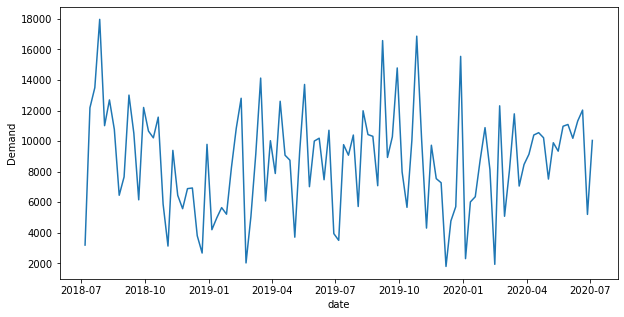

In [4]:
plt.figure(figsize=(10,5))
plt.plot(data['Week Start Date'],data['Weekly Demand Quantity'])
plt.xlabel('date')
plt.ylabel('Demand')

Every Time Series has 2 components Systematic and Non-Systematic components.

Systematic component have consistency and can be modeled. Example Trend, Seasonality and Level.

Non-Systematic component can not be modeled directly. Example noise.

Level (L): The average value in the series.

Trend (T): The increasing or decreasing value in the series.

Seasonality (S): The repeating short-term cycle in the series.

Noise (N): The random variation in the series

While modeling a Time Series we can assume it to be a Additive model or a Multiplicative model.

Additive model--

y(t) = L + T + S + N

Multiplicative model--

y(t) = L* T * S * N

In [5]:
data = data.drop(columns='Product Name')

In [6]:
data.dtypes

Week Start Date           datetime64[ns]
Weekly Demand Quantity             int64
dtype: object

In [7]:
from fbprophet import Prophet

In [8]:
data.rename(columns = {'Week Start Date' : 'ds', 'Weekly Demand Quantity': 'y'}, inplace = True)

In [9]:
data.head()

,ds,y
0,2018-07-07,3198
1,2018-07-14,12181
2,2018-07-21,13494
3,2018-07-28,17963
4,2018-08-04,11009


## Prophet

In [10]:
from fbprophet import Prophet

In [11]:
m = Prophet(interval_width=0.95, weekly_seasonality= True, yearly_seasonality= True)
model = m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=9,freq='W')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-07,4452.303081,1203.514964,11677.198827,4452.303081,4452.303081,2094.836196,2094.836196,2094.836196,3778.60064,3778.60064,3778.60064,-1683.764443,-1683.764443,-1683.764443,0.0,0.0,0.0,6547.139278
1,2018-07-14,4461.947210,2833.040254,13530.473431,4461.947210,4461.947210,3823.091364,3823.091364,3823.091364,3778.60064,3778.60064,3778.60064,44.490724,44.490724,44.490724,0.0,0.0,0.0,8285.038574
2,2018-07-21,4471.591339,5013.207978,16193.952571,4471.591339,4471.591339,6397.641340,6397.641340,6397.641340,3778.60064,3778.60064,3778.60064,2619.040700,2619.040700,2619.040700,0.0,0.0,0.0,10869.232679
3,2018-07-28,4481.235467,7368.043014,18064.677608,4481.235467,4481.235467,8201.897178,8201.897178,8201.897178,3778.60064,3778.60064,3778.60064,4423.296538,4423.296538,4423.296538,0.0,0.0,0.0,12683.132645
4,2018-08-04,4490.879598,7124.358231,17795.521083,4490.879598,4490.879598,7900.359026,7900.359026,7900.359026,3778.60064,3778.60064,3778.60064,4121.758386,4121.758386,4121.758386,0.0,0.0,0.0,12391.238624


In [13]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-07-07,6547.139278
1,2018-07-14,8285.038574
2,2018-07-21,10869.232679
3,2018-07-28,12683.132645
4,2018-08-04,12391.238624
...,...,...
109,2020-08-02,9240.436723
110,2020-08-09,7462.319713
111,2020-08-16,5425.967988
112,2020-08-23,4994.124292


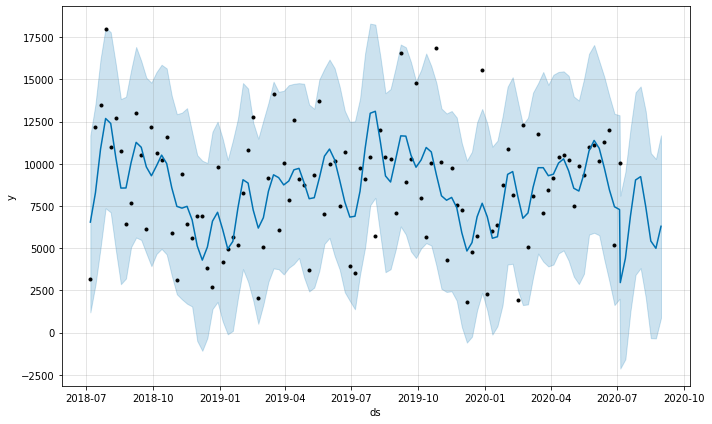

In [14]:
plot1 = m.plot(forecast)


blue line is the prediction

blue region represent upper and lower yhat

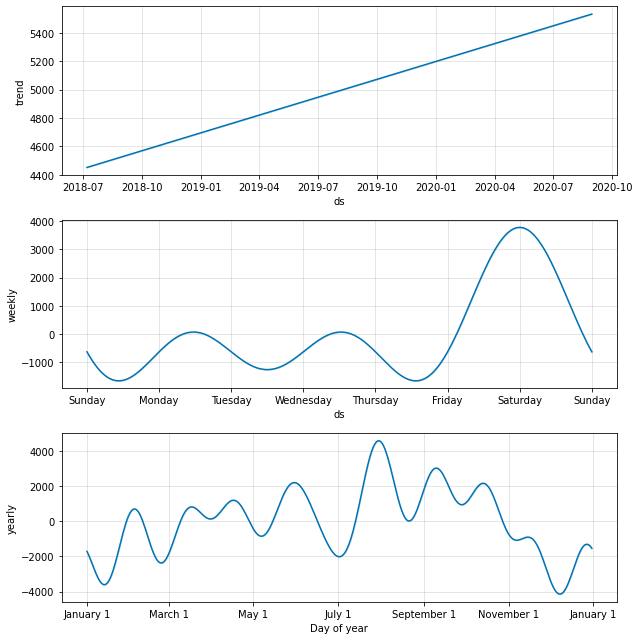

In [15]:
plot3 = m.plot_components(forecast)

In [16]:
test_data = pd.read_csv('/content/test data.xls')
                  

In [17]:
test_data = test_data.drop(columns='Product Name')

In [18]:
test_data.rename(columns = {'Week Start Date' : 'ds'}, inplace = True)

In [19]:
test_data

,ds,Weekly Demand Quantity
0,11-Jul-20,5502
1,18-Jul-20,11564
2,25-Jul-20,17374
3,1-Aug-20,8520
4,8-Aug-20,6015
5,15-Aug-20,11287
6,22-Aug-20,12076
7,29-Aug-20,6304


In [20]:
prediction = forecast[['ds','yhat']][-8:]
prediction.set_index('ds')

,yhat
ds,
2020-07-12,4397.950256
2020-07-19,6914.415781
2020-07-26,9042.475271
2020-08-02,9240.436723
2020-08-09,7462.319713
2020-08-16,5425.967988
2020-08-23,4994.124292
2020-08-30,6299.494316


In [21]:
prediction

,ds,yhat
106,2020-07-12,4397.950256
107,2020-07-19,6914.415781
108,2020-07-26,9042.475271
109,2020-08-02,9240.436723
110,2020-08-09,7462.319713
111,2020-08-16,5425.967988
112,2020-08-23,4994.124292
113,2020-08-30,6299.494316


In [22]:
y_test = np.array(test_data['Weekly Demand Quantity'])
y_pred = np.array(prediction['yhat'])

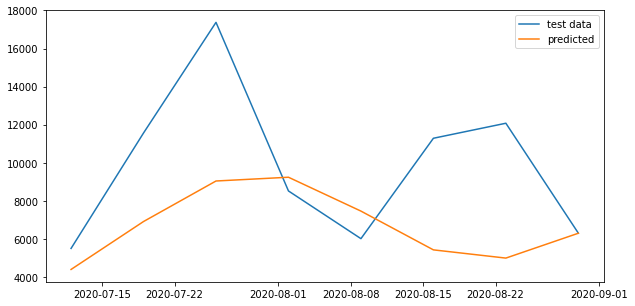

In [23]:
plt.figure(figsize = (10,5))
plt.plot(prediction['ds'],y_test, label = 'test data')
plt.plot(prediction['ds'],y_pred, label = 'predicted')
plt.legend()

In [24]:
print('MAPE error', np.round(np.average(np.abs(y_test - y_pred)/y_test)*100,2))

MAPE error 31.42


## ARIMA

In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [25]:
train_df = pd.read_csv('/content/training data.xls',
                       parse_dates = ['Week Start Date'],
                       index_col = ['Week Start Date'])

In [26]:
train_df = train_df.drop(['Product Name'], axis = 1)

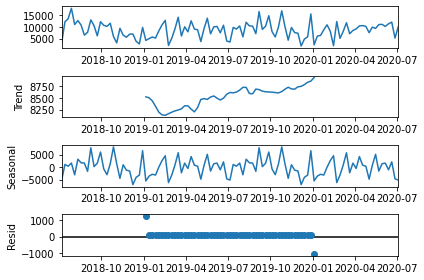

In [29]:
series = train_df[['Weekly Demand Quantity']]
result = seasonal_decompose(series, model = 'additive' )
result.plot()
plt.show()

In [ ]:
!pip install pmdarima

In [32]:
from pmdarima import auto_arima

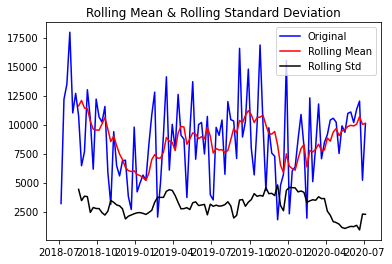

In [33]:
df = train_df
rolling_mean = df.rolling(window = 7).mean()
rolling_std = df.rolling(window = 7).std()

plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

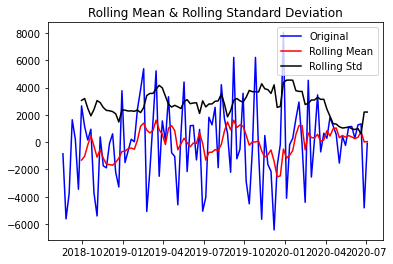

In [34]:
rolling_mean = df.rolling(window=7).mean()
df_minus_mean = df - rolling_mean
df_minus_mean.dropna(inplace=True)

df = df_minus_mean
rolling_mean = df.rolling(window = 7).mean()
rolling_std = df.rolling(window = 7).std()

plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

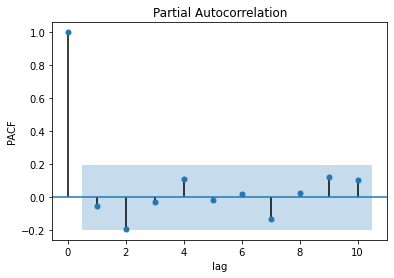

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
series = df_minus_mean
plot_pacf(series, lags = 10)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.show()

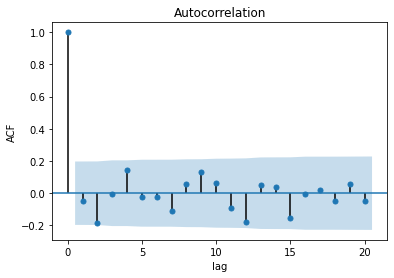

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
series = df_minus_mean
plot_acf(series)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.show()



ACF stands for AutoCorrelationFunction

ACF plot at lag k shows the correlation between the time series observstion seperated by k periods.

So we can take AR order (Autoregression order) to be k for which correlation is high i.e. for that k for which value lie outside the CI in the ACF plot.

Similary PACF is used to decide MA order for ARIMA model.

Note the blue region is 95% CI and vertical lines which cross this region are considered significant.

So we will take 2 as AR order and MA order for our ARIMA model.

Now we will apply ARIMA model to this time series.


In [37]:
AR_order = 2
differencing_order = 0
MA_order = 2
order = (AR_order, differencing_order, MA_order)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.



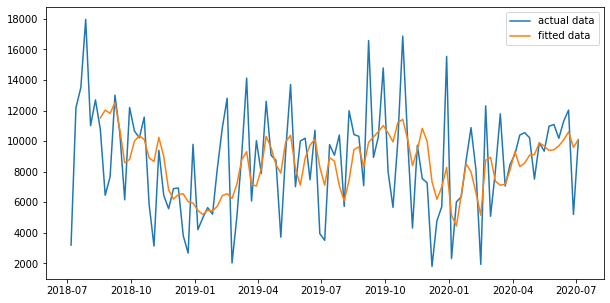

In [38]:
model = ARIMA(df, order= order,)
results = model.fit()

a = np.array(results.fittedvalues).reshape(1,-1)
rolling_mean = train_df.rolling(window=7).mean()
b = np.array(rolling_mean).reshape(1,-1)
#b = 8707.24761905*np.ones(shape=(1,len(a)))
plt.figure(figsize = (10,5))
plt.plot(train_df['Weekly Demand Quantity'], label = 'actual data')
plt.plot(pd.date_range('2018-08-18',periods = 99, freq = 'W-SAT'),sum(a,b[0,6:]).reshape(-1,1), label = 'fitted data')
plt.legend()
plt.show()

In [39]:
rolling_mean = train_df.rolling(window=7).mean()
rolling_mean = rolling_mean[6:][:]
model = ARIMA(rolling_mean, order= order)
results_for_mean = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.



In [40]:
results_for_mean.predict(99,106)

2020-07-11    10069.775395
2020-07-18     9972.036666
2020-07-25     9896.191507
2020-08-01     9826.627066
2020-08-08     9762.720636
2020-08-15     9704.011193
2020-08-22     9650.076101
2020-08-29     9600.527102
Freq: W-SAT, dtype: float64

In [41]:
results.predict(99,106)

2020-07-11    621.589240
2020-07-18    119.198174
2020-07-25   -644.852975
2020-08-01   -498.258997
2020-08-08    234.499551
2020-08-15    390.343882
2020-08-22   -196.915303
2020-08-29   -563.519021
Freq: W-SAT, dtype: float64

In [42]:
forecast_modified = np.array(results.predict(99,106))
forecast = forecast_modified + np.array(results_for_mean.predict(99,106))

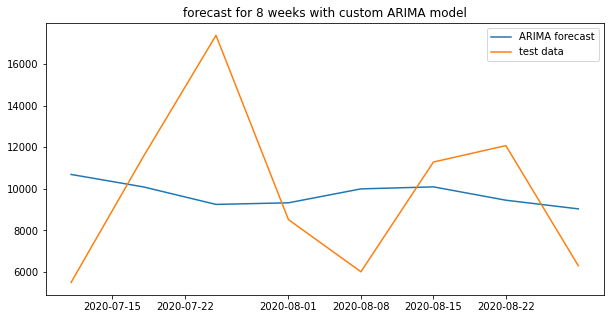

In [45]:
plt.figure(figsize =  (10,5))
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),forecast, label = 'ARIMA forecast')
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),y_test, label = 'test data')
plt.title('forecast for 8 weeks with custom ARIMA model')
plt.legend()
plt.show()

In [47]:


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def WMAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return (np.sum(np.abs((y_true - y_pred))) / np.sum(y_true)) * 100



In [49]:
mape = mean_absolute_percentage_error(y_test,forecast)
print('MAPE',mape)
wmape = WMAPE(y_test,forecast)
print('WMAPE',wmape)

MAPE 38.142203086778956
WMAPE 33.21872756063537


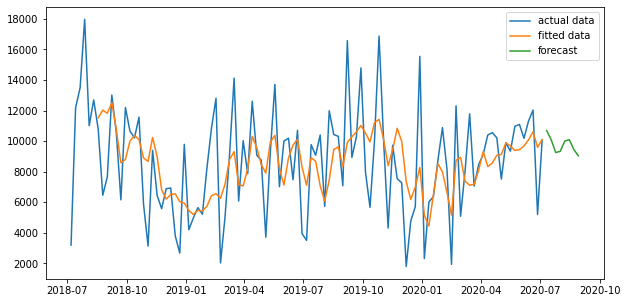

In [50]:
plt.figure(figsize = (10,5))
plt.plot(train_df['Weekly Demand Quantity'], label = 'actual data')
plt.plot(pd.date_range('2018-08-18',periods = 99, freq = 'W-SAT'),sum(a,b[0,6:]).reshape(-1,1), label = 'fitted data')
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),forecast, label = 'forecast')
plt.legend()
plt.show()

## Holts Winter Model

In [51]:
from statsmodels.tsa.holtwinters import Holt

In [52]:
es_model = Holt(train_df, initialization_method="heuristic")
es_result = es_model.fit()
es_forecast = es_result.forecast(8).rename(r'\alpha=%s'%es_result.model.params['smoothing_level'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [54]:
mape = mean_absolute_percentage_error(y_test,es_forecast)
print('MAPE',mape)
wmape = WMAPE(y_test,es_forecast)
print('WMAPE',wmape)

MAPE 37.02213429432457
WMAPE 33.01035070318659


In [55]:
es_forecast

2020-07-11    9569.819226
2020-07-18    9578.808052
2020-07-25    9587.796878
2020-08-01    9596.785704
2020-08-08    9605.774530
2020-08-15    9614.763356
2020-08-22    9623.752182
2020-08-29    9632.741008
Freq: W-SAT, Name: \alpha=0.12285714285714286, dtype: float64

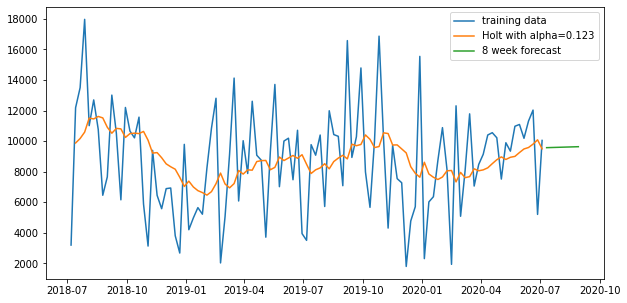

In [56]:
plt.figure(figsize = (10,5))
plt.plot(train_df['Weekly Demand Quantity'], label = 'training data')
plt.plot(es_result.predict(1), label = 'Holt with' + r' alpha=%.3f'%es_result.model.params['smoothing_level'])
plt.plot(es_forecast, label = '8 week forecast')
plt.legend()
plt.show()

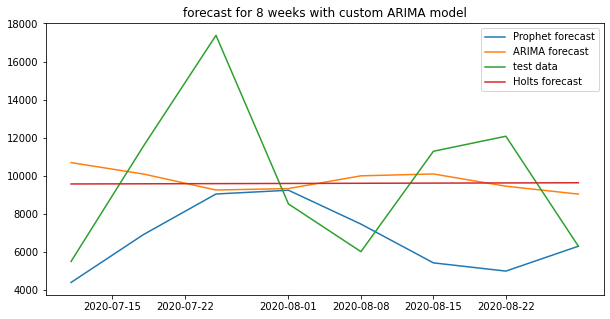

In [57]:
plt.figure(figsize =  (10,5))
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),y_pred, label = 'Prophet forecast')
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),forecast, label = 'ARIMA forecast')
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),y_test, label = 'test data')
plt.plot(pd.date_range('2020-07-11',periods = 8, freq = 'W-SAT'),es_forecast, label = 'Holts forecast')
plt.title('forecast for 8 weeks with custom ARIMA model')
plt.legend()
plt.show()